1.What is unsupervised learning in the context of machine learning?
    Unsupervised learning is a type of machine learning where the model is not given labeled data. It tries to find hidden patterns or intrinsic structures in the input data, such as clusters or associations.

2. How does K-Means clustering algorithm work?
     K-Means partitions data into K clusters by initializing K centroids, assigning each point to the nearest centroid, recalculating centroids based on current clusters, and repeating this process until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.
    A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It helps visualize the nested grouping of patterns and the distance at which clusters are merged.

4.What is the main difference between K-Means and Hierarchical Clustering?
    K-Means requires specifying the number of clusters beforehand and can reassign points between clusters, while hierarchical clustering builds a hierarchy and cannot undo previous merges.

5. What are the advantages of DBSCAN over K-Means?
    DBSCAN can detect clusters of arbitrary shapes, handles noise/outliers well, and does not require specifying the number of clusters.

6. When would you use Silhouette Score in clustering?
    Silhouette Score is used to measure how similar an object is to its own cluster compared to other clusters. It helps evaluate the quality and consistency of clustering results.

7.What are the limitations of Hierarchical Clustering?
    It has high computational complexity, does not scale well with large datasets, and once clusters are merged, they cannot be split.

8. Why is feature scaling important in clustering algorithms like K-Means?
    Because clustering algorithms use distance measures, and unscaled features can bias the results. Scaling ensures all features contribute equally.

9. How does DBSCAN identify noise points?
    Points that do not belong to any cluster (i.e., not within the neighborhood of any core point) are labeled as noise with label -1.

10.Define inertia in the context of K-Means.
    Inertia is the sum of squared distances of samples to their closest cluster center. Lower inertia indicates tighter clusters.

11.What is the elbow method in K-Means clustering?
 The elbow method involves plotting inertia versus the number of clusters and finding the "elbow point" where the rate of decrease sharply changes, indicating the optimal number of clusters.

12.Describe the concept of "density" in DBSCAN.
    Density is defined by the number of points within a specified radius (eps). A point is a core point if it has at least `min_samples` points in its neighborhood.

13. Can hierarchical clustering be used on categorical data?
    Yes, but it requires an appropriate distance metric (like Hamming distance) or transformation of categorical variables to numerical representations.

14.What does a negative Silhouette Score indicate?
    It indicates that a sample is likely assigned to the wrong cluster, as it is closer to a neighboring cluster than to the one it was assigned to.

15.Explain the term "linkage criteria" in hierarchical clustering.
    Linkage criteria determine how the distance between clusters is calculated. Common methods include single, complete, average, and ward linkage.

16.Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
    Because K-Means assumes clusters are spherical and of equal size/density. It fails to handle clusters with varying characteristics.

17.What are the core parameters in DBSCAN, and how do they influence clustering?
    The main parameters are eps (neighborhood radius) and min_samples (minimum number of points to form a dense region). They determine how clusters are formed and what points are considered noise.

18.How does K-Means++ improve upon standard K-Means initialization?
    K-Means++ initializes centroids in a smarter way to spread them out, reducing the chances of poor clustering and improving convergence.

19.What is agglomerative clustering?
    Agglomerative clustering is a bottom-up approach to hierarchical clustering where each data point starts in its own cluster, and pairs of clusters are merged iteratively.

20.What makes Silhouette Score a better metric than just inertia for model evaluation?
    Unlike inertia, which only considers intra-cluster distance, Silhouette Score accounts for both intra-cluster cohesion and inter-cluster separation, offering a more balanced evaluation.


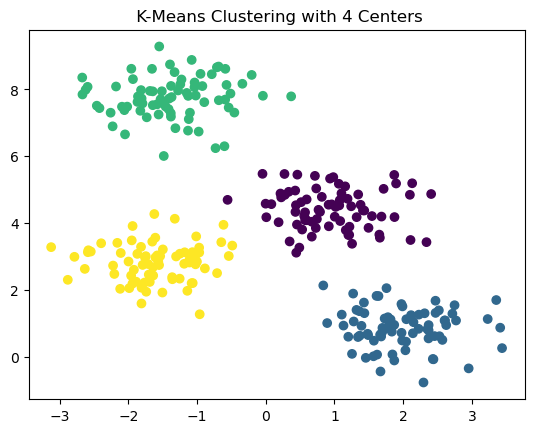

In [10]:
# Q21: Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(' K-Means Clustering with 4 Centers')
plt.show()

In [8]:
# Q22: Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
print(" First 10 Agglomerative Clustering labels:", labels[:10])

 First 10 Agglomerative Clustering labels: [1 1 1 1 1 1 1 1 1 1]


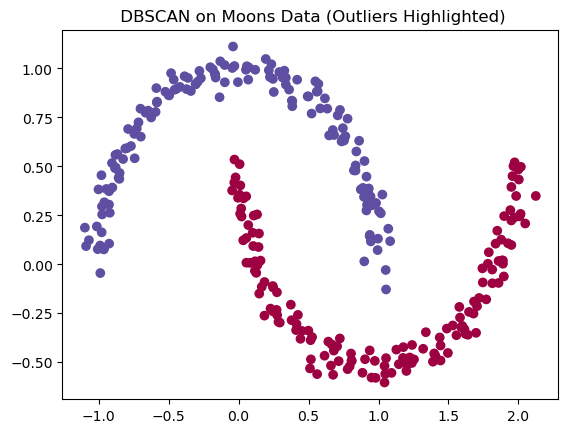

In [12]:
# Q23: Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=np.where(labels == -1, -1, labels), cmap='Spectral')
plt.title(' DBSCAN on Moons Data (Outliers Highlighted)')
plt.show()


In [16]:
# Q24: Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(" Cluster sizes:", dict(zip(unique, counts)))

 Cluster sizes: {0: 65, 1: 51, 2: 62}


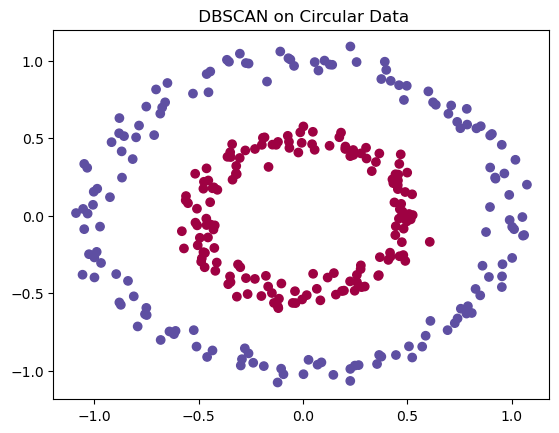

In [18]:
# Q25: Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=0)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='Spectral')
plt.title(' DBSCAN on Circular Data')
plt.show()

In [20]:
# Q26: Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cancer.data)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
print(" K-Means Centroids:\n", kmeans.cluster_centers_)

 K-Means Centroids:
 [[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


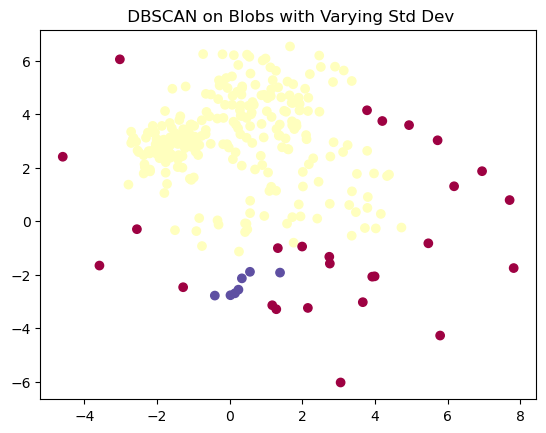

In [22]:
# Q27: Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=0)
dbscan = DBSCAN(eps=0.9, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='Spectral')
plt.title(' DBSCAN on Blobs with Varying Std Dev')
plt.show()

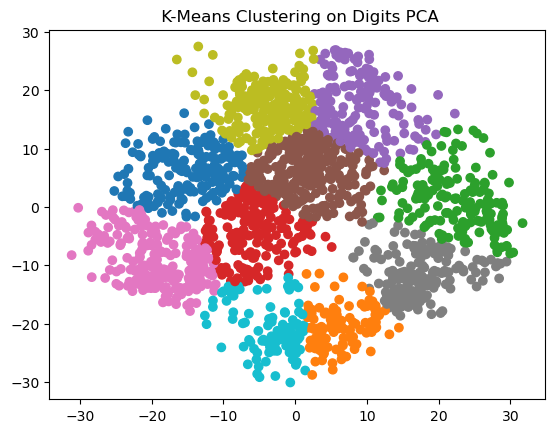

In [24]:

# Q28: Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title(' K-Means Clustering on Digits PCA')
plt.show()


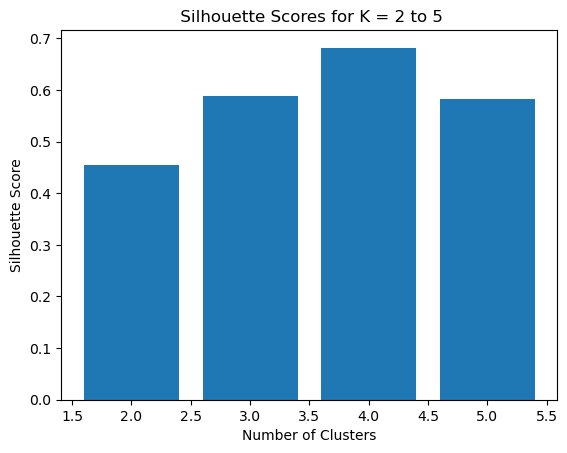

In [26]:
# Q29: Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)
plt.bar(range(2, 6), scores)
plt.title(' Silhouette Scores for K = 2 to 5')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

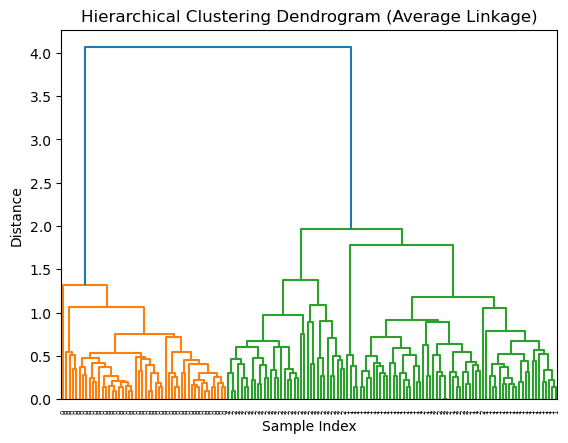

In [28]:
# Q30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data
linked = linkage(X, method='average')
dendrogram(linked, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

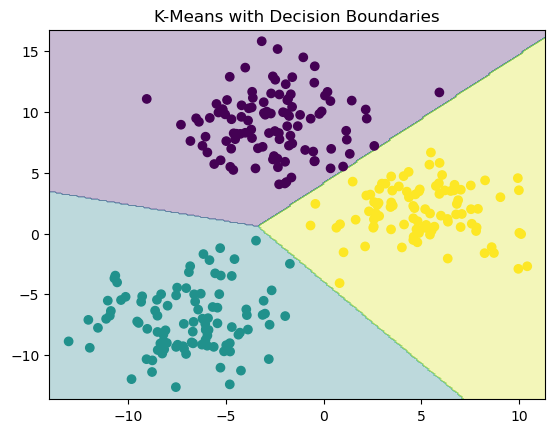

In [30]:
# Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize decision boundaries.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
y_kmeans = kmeans.predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.title("K-Means with Decision Boundaries")
plt.show()

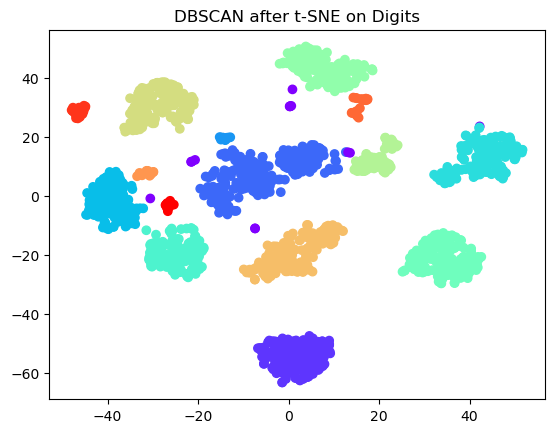

In [32]:
# Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

X, y = load_digits(return_X_y=True)
X_embedded = TSNE(n_components=2, random_state=0).fit_transform(X)
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_embedded)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN after t-SNE on Digits")
plt.show()

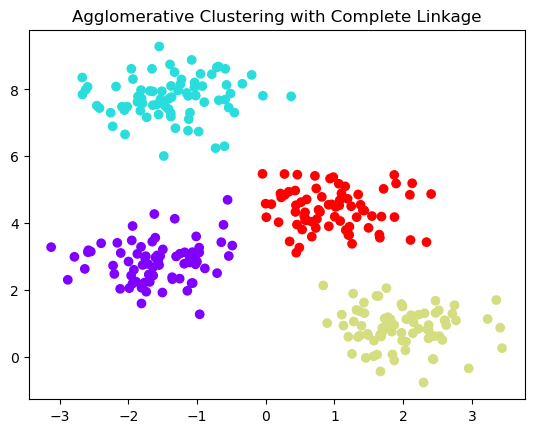

In [34]:
# Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()


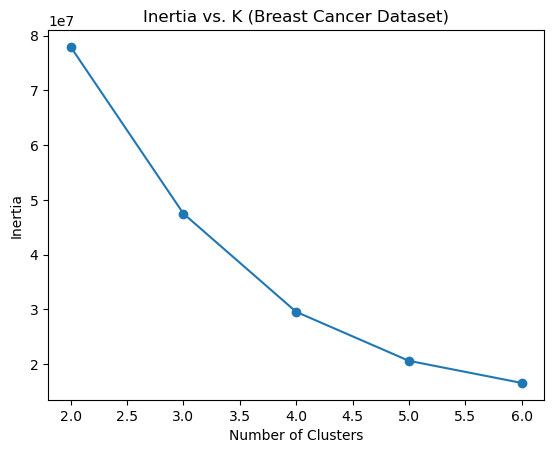

In [36]:

# Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
from sklearn.datasets import load_breast_cancer

X, _ = load_breast_cancer(return_X_y=True)
inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("Inertia vs. K (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

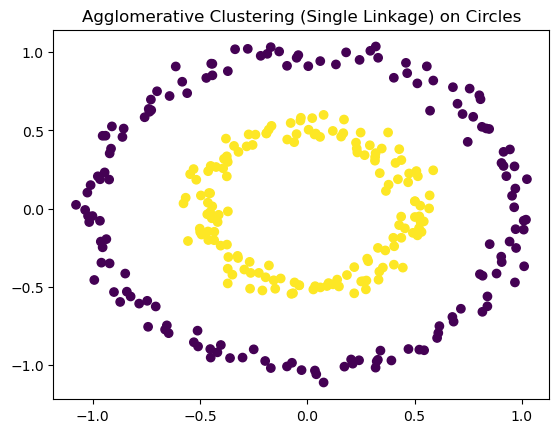

In [38]:
# Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()

In [40]:
# Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
from sklearn.preprocessing import StandardScaler

X, _ = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)
labels = DBSCAN(eps=1.5, min_samples=5).fit_predict(X_scaled)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", num_clusters)

Number of clusters (excluding noise): 0


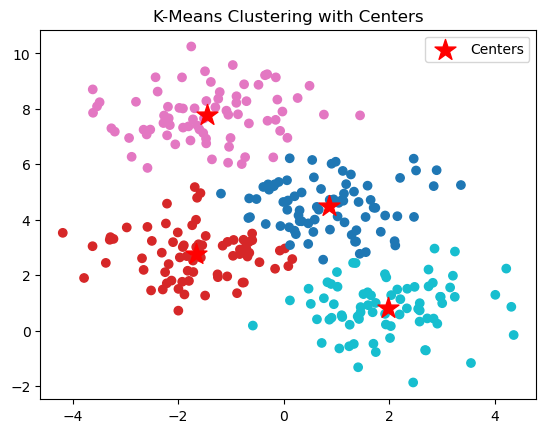

In [42]:
# Q37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)
km = KMeans(n_clusters=4, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='tab10')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centers')
plt.legend()
plt.title("K-Means Clustering with Centers")
plt.show()

In [44]:
# Q38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
X, _ = load_iris(return_X_y=True)
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
num_noise = list(labels).count(-1)
print("Number of noise points in Iris dataset:", num_noise)

Number of noise points in Iris dataset: 17


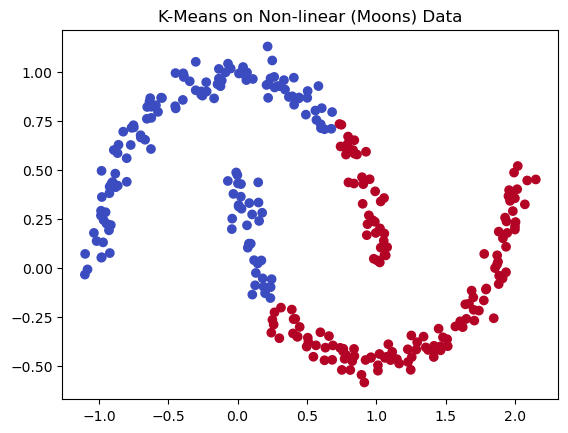

In [46]:
# Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
X, _ = make_moons(n_samples=300, noise=0.05)
km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("K-Means on Non-linear (Moons) Data")
plt.show()

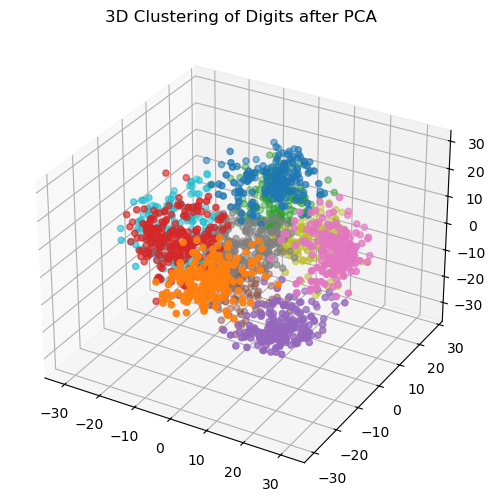

In [48]:
# Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
from mpl_toolkits.mplot3d import Axes3D

X, _ = load_digits(return_X_y=True)
X_pca = PCA(n_components=3).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab10')
ax.set_title("3D Clustering of Digits after PCA")
plt.show()

Silhouette Score: 0.678738720085253


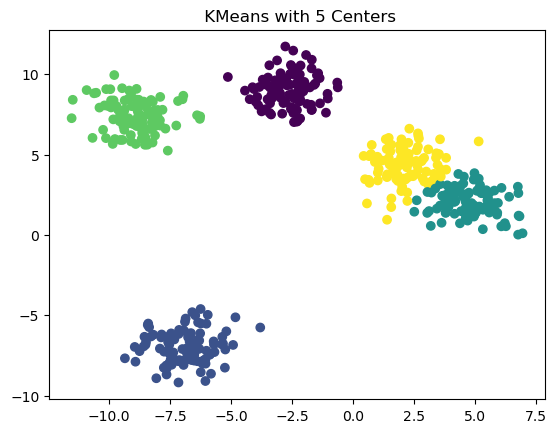

In [64]:
# Q41: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title(" KMeans with 5 Centers")
plt.show()

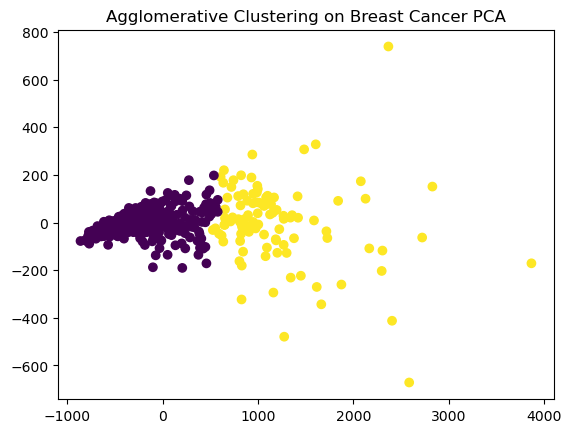

In [66]:
# Q42: Breast Cancer dataset, PCA, Agglomerative Clustering
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = PCA(n_components=2).fit_transform(data.data)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering on Breast Cancer PCA")
plt.show()

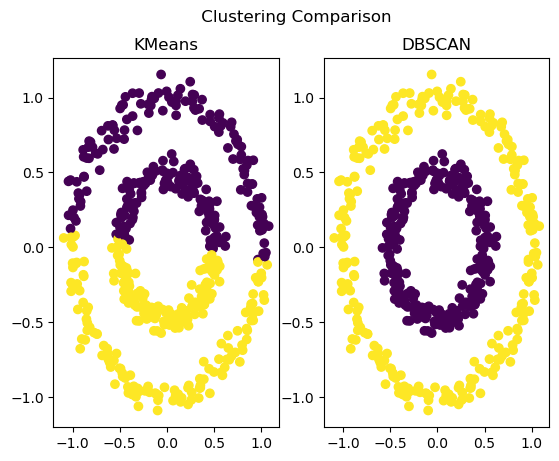

In [68]:
# Q43: Noisy circles with KMeans and DBSCAN
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
labels_kmeans = KMeans(n_clusters=2).fit_predict(X)
labels_dbscan = DBSCAN(eps=0.2).fit_predict(X)

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans)
plt.title("KMeans")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan)
plt.title("DBSCAN")
plt.suptitle(" Clustering Comparison")
plt.show()

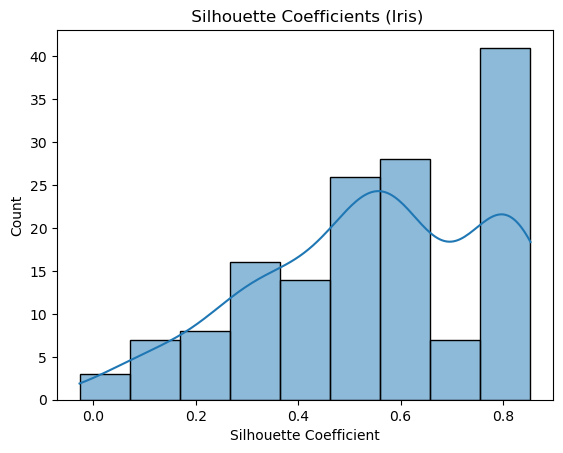

In [70]:
# Q44: Iris dataset, plot Silhouette Coefficient after KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import seaborn as sns

X = load_iris().data
labels = KMeans(n_clusters=3).fit_predict(X)
scores = silhouette_samples(X, labels)
sns.histplot(scores, kde=True)
plt.title(" Silhouette Coefficients (Iris)")
plt.xlabel("Silhouette Coefficient")
plt.show()

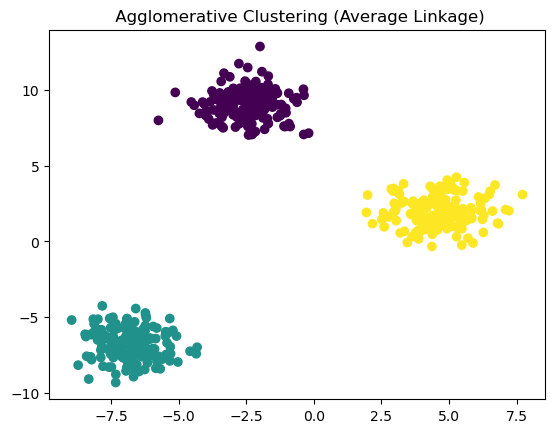

In [72]:
# Q45: make_blobs + Agglomerative Clustering ('average')
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
labels = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title(" Agglomerative Clustering (Average Linkage)")
plt.show()

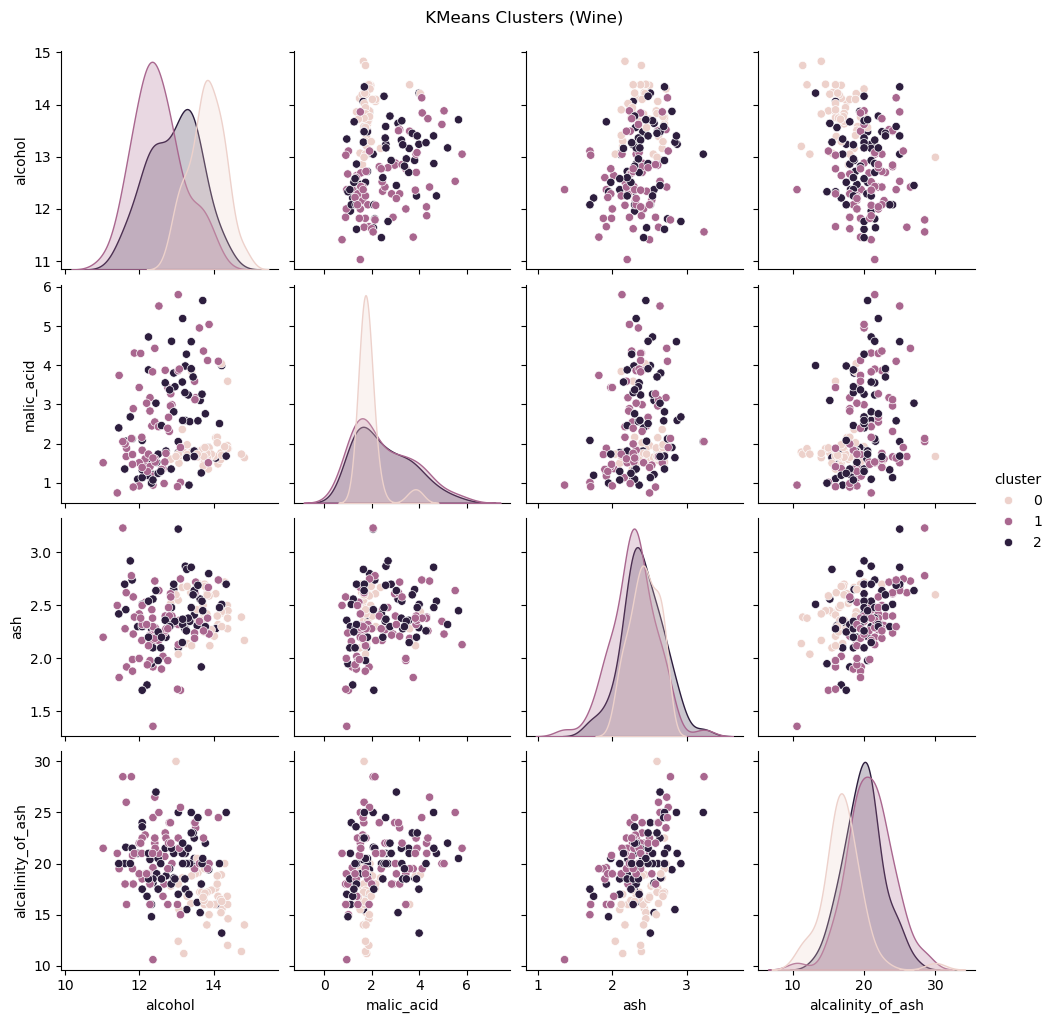

In [74]:
# Q46: Wine dataset pairplot of KMeans clusters
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data[:, :4], columns=data.feature_names[:4])
df['cluster'] = KMeans(n_clusters=3).fit_predict(data.data)
sns.pairplot(df, hue='cluster')
plt.suptitle(" KMeans Clusters (Wine)", y=1.02)
plt.show()

Clusters: 3 Noise Points: 107


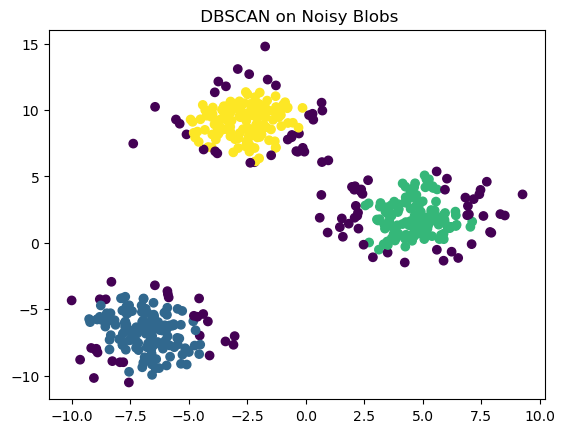

In [76]:
# Q47: Noisy blobs and DBSCAN cluster/noise count
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)
labels = DBSCAN(eps=0.8, min_samples=10).fit_predict(X)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)
print("Clusters:", num_clusters, "Noise Points:", num_noise)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title(" DBSCAN on Noisy Blobs")
plt.show()

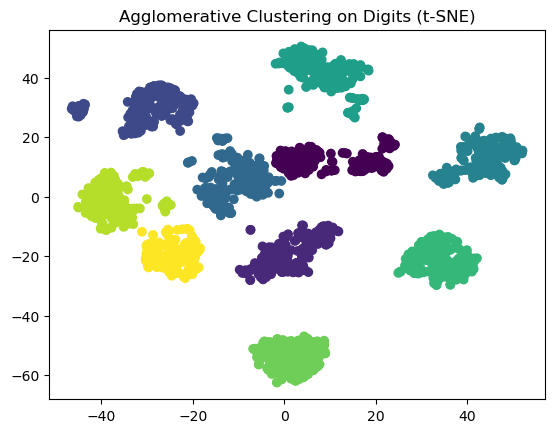

In [80]:
# Q48: Digits dataset, t-SNE + Agglomerative Clustering
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

X = load_digits().data
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
labels = AgglomerativeClustering(n_clusters=10).fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()